In [1]:
cd ..

/home/toor/study/mfti nlp/prune_labse_en_ru


/home/toor/miniconda3/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Setup

In [2]:
# !git clone https://github.com/avidale/encodechka
# !python encodechka/setup.py install
# !rm -rf encodechka

In [3]:
from encodechka_eval import tasks
from encodechka_eval.bert_embedders import embed_bert_both

import os
import gc

import shutil
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange
from transformers import AutoModel, AutoTokenizer

In [4]:
sent_tasks = [TaskClass() for TaskClass in tasks.SENTENCE_TASKS]
speed_task_cpu = tasks.SpeedTask()
speed_task_gpu = tasks.SpeedTask()

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()

# Evaluate transformers-based models

In [5]:
bert_models = [
    'models/prune_model.pth',
    'models/tune_model.pth',
    'sentence-transformers/LaBSE',
    'cointegrated/LaBSE-en-ru',
    'cointegrated/rubert-tiny2',
]

In [6]:
torch.set_float32_matmul_precision('high')
for model_name in tqdm(bert_models):
    print('\n\n\n', model_name, '\n==========================================')
    if 'models' in model_name.lower():
        tokenizer = AutoTokenizer.from_pretrained('cointegrated/LaBSE-en-ru')
        model = torch.load(model_name).cuda()
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModel.from_pretrained(model_name).cuda()
    if tokenizer.model_max_length > 2000 or not tokenizer.model_max_length:
        # for models other than T5, inputs must be truncated
        tokenizer.model_max_length = 512
    cleanup()

    for task in sent_tasks:
        task.eval(lambda x: embed_bert_both(x, model, tokenizer), model_name)

    speed_task_gpu.eval(lambda x: embed_bert_both(x, model, tokenizer), model_name)
    model.cpu()
    speed_task_cpu.eval(lambda x: embed_bert_both(x, model, tokenizer), model_name)

  0%|          | 0/5 [00:00<?, ?it/s]




 models/prune_model.pth 


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]




 models/tune_model.pth 


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]




 sentence-transformers/LaBSE 


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]




 cointegrated/LaBSE-en-ru 


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]




 cointegrated/rubert-tiny2 


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/1924 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

In [7]:
model_sizes = {}
model_dims = {}
dn = 'models/model_to_size'

for m in tqdm(bert_models):
    print(m, end = ' \t ')
    if 'models' in m.lower():
        tokenizer = AutoTokenizer.from_pretrained('cointegrated/LaBSE-en-ru')        
        model = torch.load(m).cuda()
    else:        
        tokenizer = AutoTokenizer.from_pretrained(m)        
        model = AutoModel.from_pretrained(m).cuda()
    if os.path.exists(dn):
        shutil.rmtree(dn)
    model.save_pretrained(dn)
    model_sizes[m] = sum(os.path.getsize(dn + '/' + p) for p in os.listdir(dn)) / 2**20

    with torch.inference_mode():
        vecs = embed_bert_both('привет', model, tokenizer)
    dim = len(list(vecs.values())[0])
    model_dims[m] = dim    
    cleanup()
    
if os.path.exists(dn):
    shutil.rmtree(dn)

  0%|          | 0/5 [00:00<?, ?it/s]

models/prune_model.pth 	 models/tune_model.pth 	 sentence-transformers/LaBSE 	 cointegrated/LaBSE-en-ru 	 cointegrated/rubert-tiny2 	 

# Total Results

In [8]:
full_cache = {type(task).__name__: task.full_cache for task in sent_tasks}
score_cache = {type(task).__name__: task.score_cache for task in sent_tasks}

df = pd.DataFrame(score_cache)
df.index.name = 'model'

TASK_NAMES = ['STSBTask', 'ParaphraserTask', 'XnliTask', 'SentimentTask',
       'ToxicityTask', 'InappropriatenessTask', 'IntentsTask', 'IntentsXTask']
df['mean_s'] = df[TASK_NAMES].mean(axis=1)

df['cpu_speed'] = speed_task_cpu.score_cache
df['gpu_speed'] = speed_task_gpu.score_cache
df['disk_size'] = pd.Series(model_sizes)
df['dim'] = pd.Series(model_dims)

df.index[df.dim.isnull()]
df

STSBTask  ParaphraserTask  XnliTask  \
model                                                              
models/prune_model.pth       0.707489         0.466482  0.375250   
models/tune_model.pth        0.788943         0.650096  0.432136   
sentence-transformers/LaBSE  0.794598         0.657368  0.430539   
cointegrated/LaBSE-en-ru     0.794377         0.658694  0.430739   
cointegrated/rubert-tiny2    0.750403         0.651361  0.416966   

                             SentimentTask  ToxicityTask  \
model                                                      
models/prune_model.pth            0.675667      0.898628   
models/tune_model.pth             0.758667      0.938859   
sentence-transformers/LaBSE       0.762000      0.947569   
cointegrated/LaBSE-en-ru          0.761000      0.946333   
cointegrated/rubert-tiny2         0.737333      0.936705   

                             InappropriatenessTask  IntentsTask  IntentsXTask  \
model                                                                           
models/prune_model.pth                    0.698448       0.6830        0.5400   
models/tune_model.pth                     0.755746       0.7794        0.7652   
sentence-transformers/LaBSE               0.765842       0.7888        0.7634   
cointegrated/LaBSE-en-ru                  0.765800       0.7892        0.7688   
cointegrated/rubert-tiny2                 0.746139       0.7562        0.6396   

                               mean_s  cpu_speed  gpu_speed    disk_size  dim  
model                                                                          
models/prune_model.pth       0.630620  12.942841   2.730181   327.496765  768  
models/tune_model.pth        0.733631  12.099168   2.480319   327.496765  768  
sentence-transformers/LaBSE  0.738765  19.530564   2.467863  1796.465893  768  
cointegrated/LaBSE-en-ru     0.739368  19.821016   2.477383   489.619812  768  
cointegrated/rubert-tiny2    0.704338   1.721676   1.039371   111.371868  312

# Plotting

In [9]:
df.reset_index(inplace=True)
df.disk_size = df.disk_size.round(0)

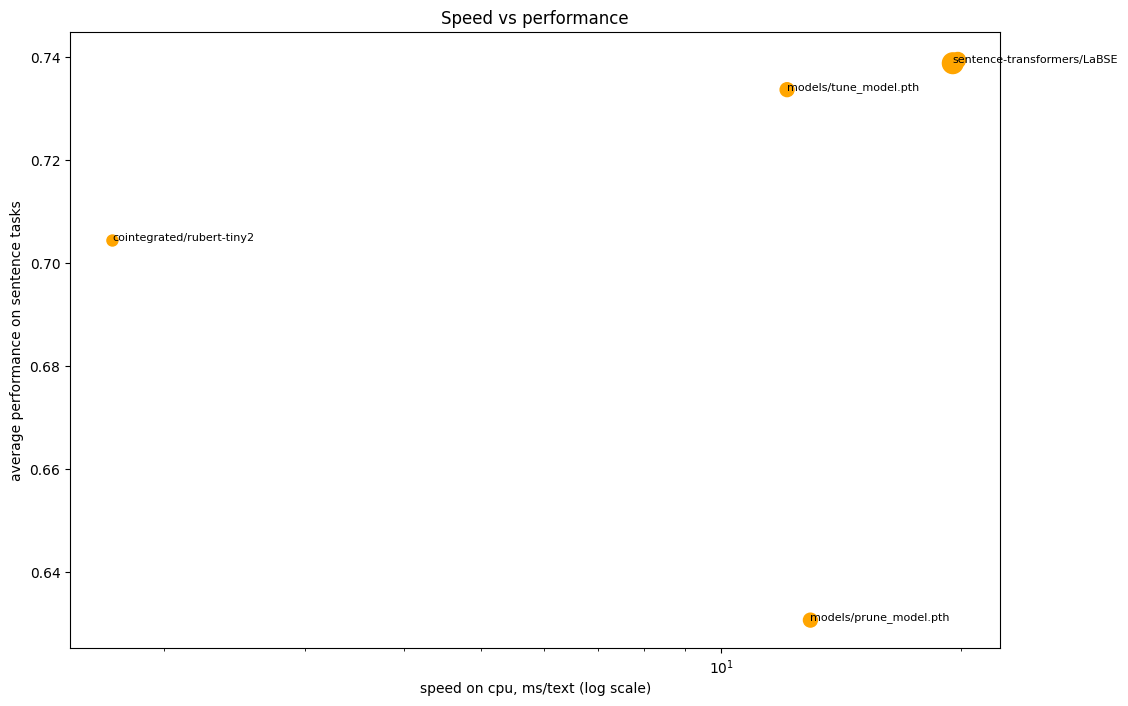

In [10]:
fig, ax = plt.subplots(figsize=(12, 8));
xx, yy = df.cpu_speed, df.mean_s
ss = np.log(df.disk_size) * 20 + 5
ss = 10 + np.sqrt(df.disk_size) * 5
ax.scatter(xx, yy, s=ss, c='orange')
labels = df.model.to_list()
texts = []
for x, y, text in zip(xx, yy, labels):
    if text not in {
            'cointegrated/LaBSE-en-ru',
        }:
        texts.append(ax.text(x, y, text, size=8))
plt.xscale('log');
plt.xlabel('speed on cpu, ms/text (log scale)')
plt.ylabel('average performance on sentence tasks')
plt.title('Speed vs performance');

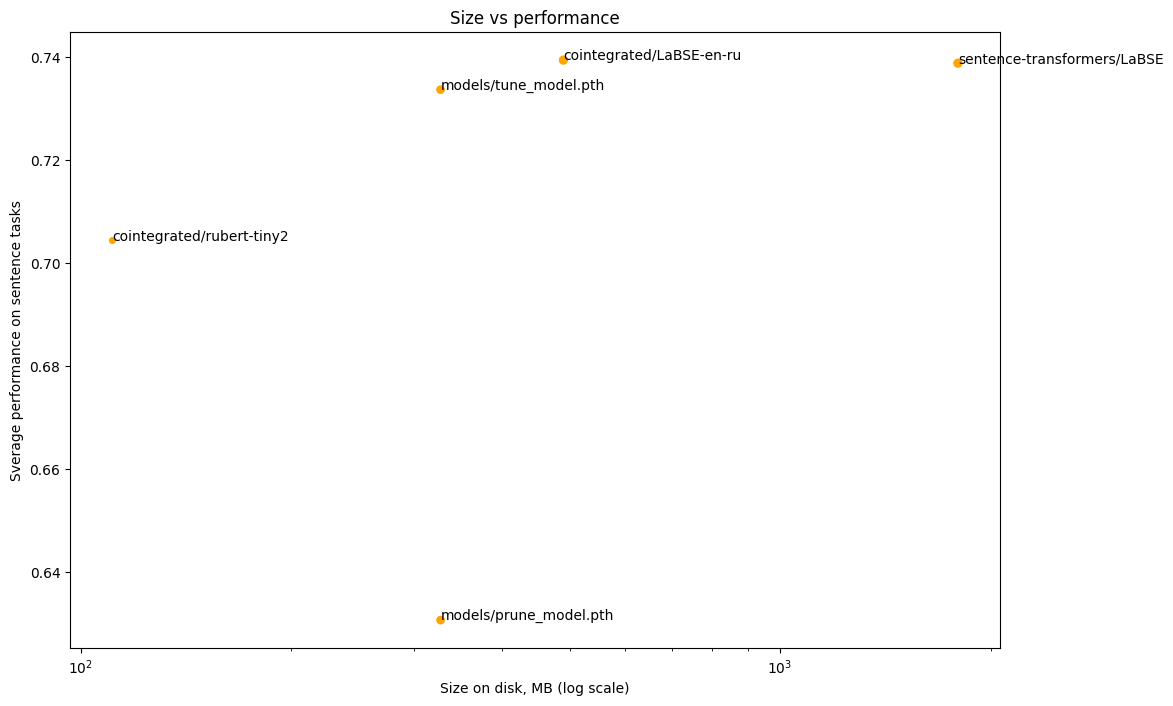

In [11]:
fig, ax = plt.subplots(figsize=(12, 8));
xx, yy = np.maximum(df.disk_size, 10), df.mean_s
ss = np.log(df.disk_size) * 20 + 5
ss = 10 + np.sqrt(df.cpu_speed) * 5
ax.scatter(xx, yy, s=ss, c='orange')
labels = df.model.to_list()
texts = []
for x, y, text in zip(xx, yy, labels):
    texts.append(ax.text(x, y, text, size=10))
plt.xscale('log');
plt.xlabel('Size on disk, MB (log scale)')
plt.ylabel('Sverage performance on sentence tasks')
plt.title('Size vs performance');

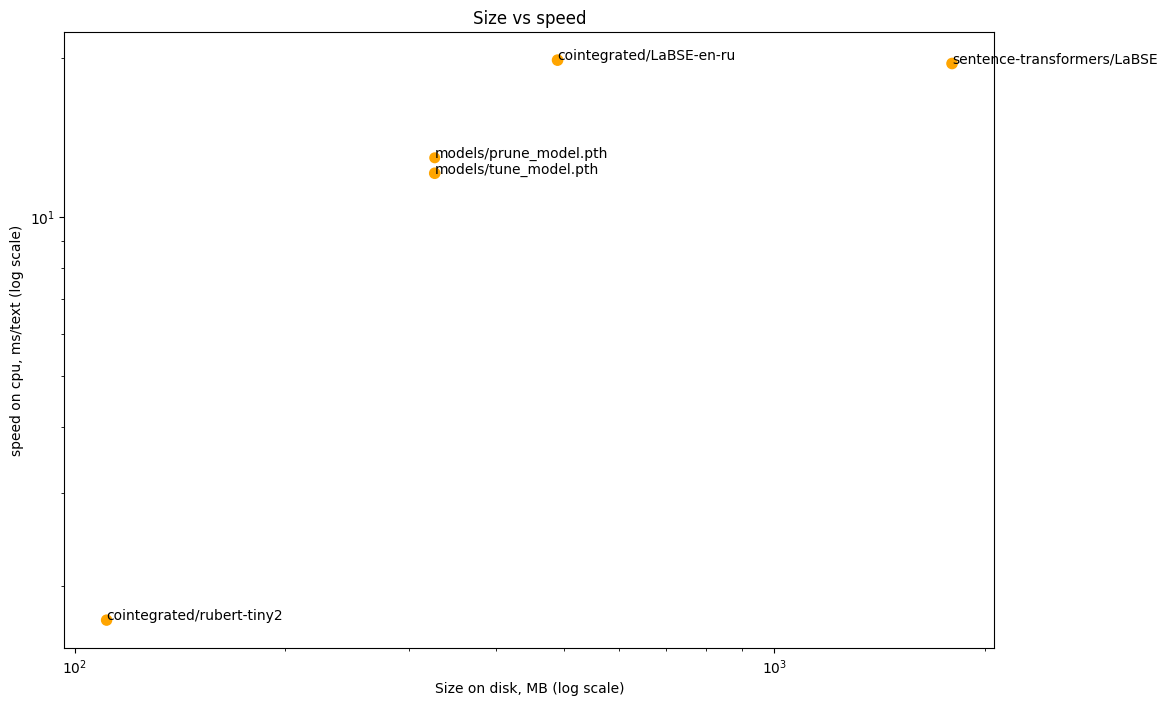

In [12]:
fig, ax = plt.subplots(figsize=(12, 8));
xx, yy = np.maximum(df.disk_size, 10), df.cpu_speed
ss = np.log(df.disk_size) * 20 + 5
ss = 10 + df.mean_s * 60
ax.scatter(xx, yy, s=ss, c='orange')
labels = df.model.to_list()
texts = []
for x, y, text in zip(xx, yy, labels):
    texts.append(ax.text(x, y, text, size=10))
plt.xscale('log');
plt.yscale('log');
plt.xlabel('Size on disk, MB (log scale)')
plt.ylabel('speed on cpu, ms/text (log scale)')
plt.title('Size vs speed');

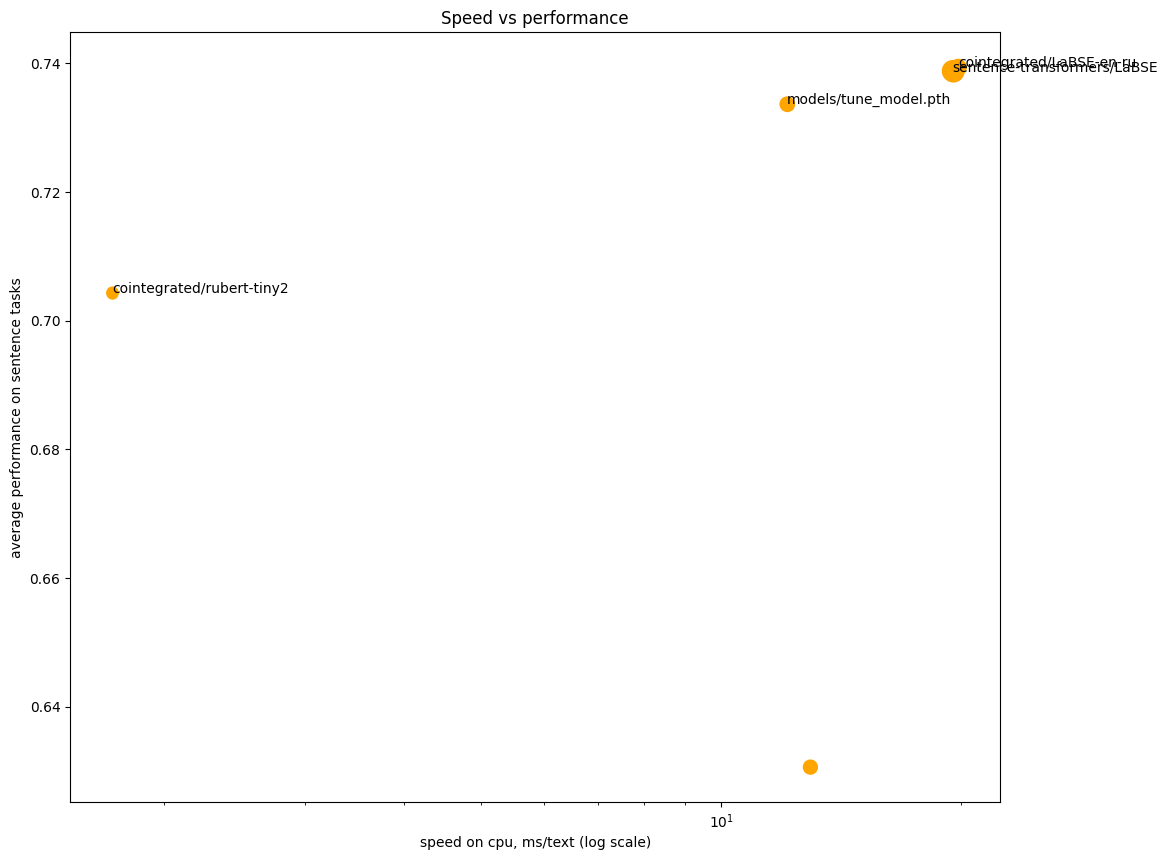

In [13]:
def plot_frontier(ax, xx, yy, labels, ss=None, text_size=10, color='orange', ocolor='orange'):
    ax.scatter(xx, yy, s=ss, c=color)
    points = pd.DataFrame({'x': xx, 'y': yy, 'sizes': ss, 'text': labels}).sort_values('y', ascending=False)
    best = np.infty
    for i, row in points.iterrows():
        if row.x < best:
            best = row.x
            ax.scatter([row.x], [row.y], s=[row.sizes], c=ocolor)
            ax.text(row.x, row.y, row.text, size=text_size)

fig, ax = plt.subplots(figsize=(12, 10));
plot_frontier(ax, xx=df.cpu_speed, yy=df.mean_s, labels=df.model.to_list(), ss=10 + np.sqrt(df.disk_size) * 5)

plt.xscale('log');
plt.xlabel('speed on cpu, ms/text (log scale)')
plt.ylabel('average performance on sentence tasks')
plt.title('Speed vs performance');

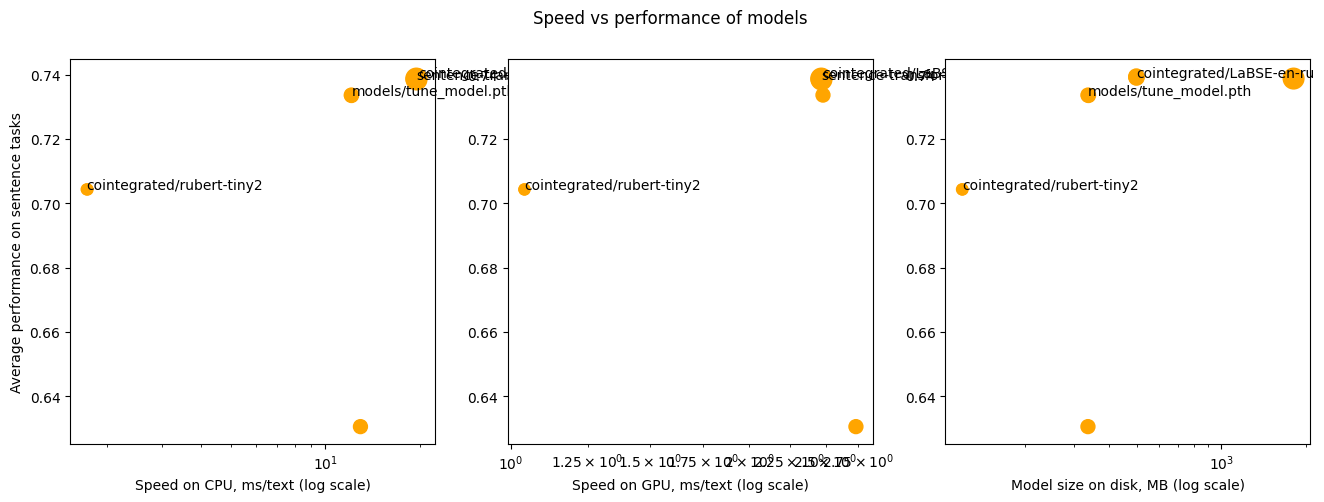

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5));
ss = ss=10 + np.sqrt(df.disk_size) * 5

plot_frontier(axs[0], xx=df.cpu_speed, yy=df.mean_s, labels=df.model.to_list(), ss=ss)
axs[0].set_xscale('log');
axs[0].set_ylabel('Average performance on sentence tasks');
axs[0].set_xlabel('Speed on CPU, ms/text (log scale)')

plot_frontier(axs[1], xx=df.gpu_speed, yy=df.mean_s, labels=df.model.to_list(), ss=ss)
axs[1].set_xscale('log');
axs[1].set_xlabel('Speed on GPU, ms/text (log scale)')

plot_frontier(axs[2], xx=df.disk_size+9, yy=df.mean_s, labels=df.model.to_list(), ss=ss)
axs[2].set_xscale('log');
axs[2].set_xlabel('Model size on disk, MB (log scale)')

plt.suptitle('Speed vs performance of models');

# plt.savefig('pareto.pdf', dpi=300, transparent=False, bbox_inches='tight')

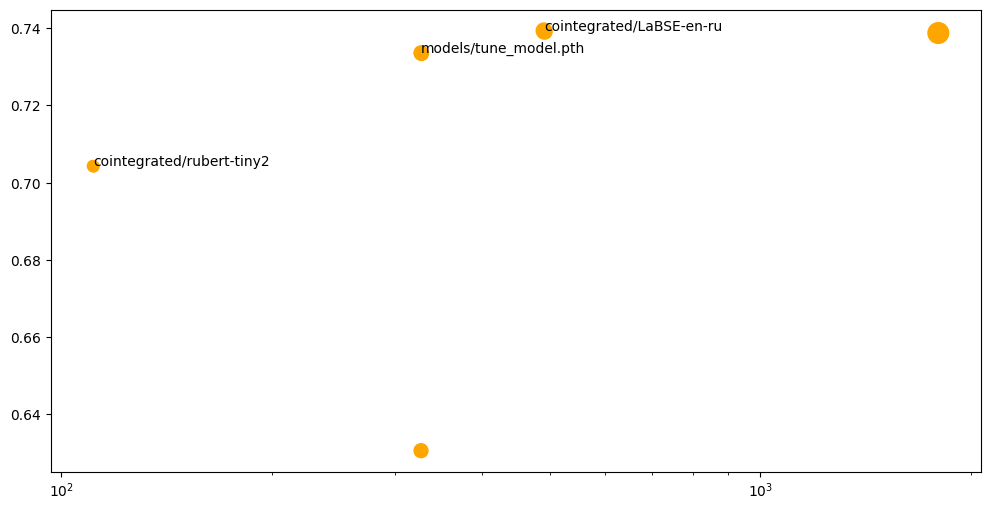

In [15]:
fig, ax = plt.subplots(figsize=(12, 6));
plot_frontier(ax, xx=df.disk_size, yy=df.mean_s, labels=df.model.to_list(), ss=10 + np.sqrt(df.disk_size) * 5)
plt.xscale('log');

In [16]:
tmp = df.sort_values('mean_s', ascending=False).round(4)
tmp['mean_s'] = df['mean_s'].round(3)
tmp['cpu_speed'] = df['cpu_speed'].round(1)
tmp['gpu_speed'] = df['gpu_speed'].round(1)
tmp = tmp.rename({'FactRuTask': 'NE1',
 'InappropriatenessTask': 'IA',
 'IntentsTask': 'IC',
 'IntentsXTask': 'ICX',
 'ParaphraserTask': 'PI',
 'RudrTask': 'NE2',
 'STSBTask': 'STS',
 'SentimentTask': 'SA',
 'ToxicityTask': 'TI',
 'XnliTask': 'NLI',
 'cpu_speed': 'CPU',
 'disk_size': 'size',
 'gpu_speed': 'GPU',
 'mean_s': 'Mean S'}, axis=1)
print(tmp.fillna('').to_markdown(index=False))

| model                       |    STS |     PI |    NLI |     SA |     TI |     IA |     IC |    ICX |   Mean S |   CPU |   GPU |   size |   dim |
|:----------------------------|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|---------:|------:|------:|-------:|------:|
| cointegrated/LaBSE-en-ru    | 0.7944 | 0.6587 | 0.4307 | 0.761  | 0.9463 | 0.7658 | 0.7892 | 0.7688 |    0.739 |  19.8 |   2.5 |    490 |   768 |
| sentence-transformers/LaBSE | 0.7946 | 0.6574 | 0.4305 | 0.762  | 0.9476 | 0.7658 | 0.7888 | 0.7634 |    0.739 |  19.5 |   2.5 |   1796 |   768 |
| models/tune_model.pth       | 0.7889 | 0.6501 | 0.4321 | 0.7587 | 0.9389 | 0.7557 | 0.7794 | 0.7652 |    0.734 |  12.1 |   2.5 |    327 |   768 |
| cointegrated/rubert-tiny2   | 0.7504 | 0.6514 | 0.417  | 0.7373 | 0.9367 | 0.7461 | 0.7562 | 0.6396 |    0.704 |   1.7 |   1   |    111 |   312 |
| models/prune_model.pth      | 0.7075 | 0.4665 | 0.3752 | 0.6757 | 0.8986 | 0.6984 | 0.683  | 0.54   |    0.631

Plot scores for each task, with the best model highlighted.

In [17]:
tmp2 = tmp[tmp.columns[:11]].round(2).fillna('').astype(str)
for c in tmp.columns[1:11]:
    tmp2.loc[tmp[c].idxmax(), c] = '**{}**'.format(tmp2.loc[tmp[c].idxmax(), c])
print(tmp2.to_markdown(index=False))

| model                       | STS      | PI       | NLI      | SA       | TI       | IA       | IC       | ICX      | Mean S   | CPU      |
|:----------------------------|:---------|:---------|:---------|:---------|:---------|:---------|:---------|:---------|:---------|:---------|
| cointegrated/LaBSE-en-ru    | 0.79     | **0.66** | 0.43     | 0.76     | 0.95     | **0.77** | **0.79** | **0.77** | **0.74** | **19.8** |
| sentence-transformers/LaBSE | **0.79** | 0.66     | 0.43     | **0.76** | **0.95** | 0.77     | 0.79     | 0.76     | 0.74     | 19.5     |
| models/tune_model.pth       | 0.79     | 0.65     | **0.43** | 0.76     | 0.94     | 0.76     | 0.78     | 0.77     | 0.73     | 12.1     |
| cointegrated/rubert-tiny2   | 0.75     | 0.65     | 0.42     | 0.74     | 0.94     | 0.75     | 0.76     | 0.64     | 0.7      | 1.7      |
| models/prune_model.pth      | 0.71     | 0.47     | 0.38     | 0.68     | 0.9      | 0.7      | 0.68     | 0.54     | 0.63     | 12.9     |


Plot aggregated scores, with Pareto optimal models highlighted.

In [18]:
tmp2 = tmp[['model', 'CPU', 'GPU', 'size', 'Mean S', 'dim']].fillna('').astype(str)
for c in ['CPU', 'GPU', 'size']:
    best = None
    for k, v in tmp[c].items():
        if v is None:
            continue
        if best is None or v < best:
            best = v
            tmp2.loc[k, c] = '**{}**'.format(tmp2.loc[k, c])
print(tmp2.to_markdown(index=False))

| model                       | CPU      | GPU     | size      |   Mean S |   dim |
|:----------------------------|:---------|:--------|:----------|---------:|------:|
| cointegrated/LaBSE-en-ru    | **19.8** | **2.5** | **490.0** |    0.739 |   768 |
| sentence-transformers/LaBSE | **19.5** | 2.5     | 1796.0    |    0.739 |   768 |
| models/tune_model.pth       | **12.1** | 2.5     | **327.0** |    0.734 |   768 |
| cointegrated/rubert-tiny2   | **1.7**  | **1.0** | **111.0** |    0.704 |   312 |
| models/prune_model.pth      | 12.9     | 2.7     | 327.0     |    0.631 |   768 |


In [19]:
def plot_frontier(ax, xx, yy, labels, ss=None, text_size=10, color='orange', ocolor='orange'):
    ax.scatter(xx, yy, s=ss, c=color)
    points = pd.DataFrame({'x': xx, 'y': yy, 'sizes': ss, 'text': labels}).sort_values('y', ascending=False)
    best = np.infty
    for i, row in points.iterrows():
        if row.x < best:
            best = row.x
            ax.scatter([row.x], [row.y], s=[row.sizes], c=ocolor)
            ax.text(row.x, row.y, row.text, size=text_size)

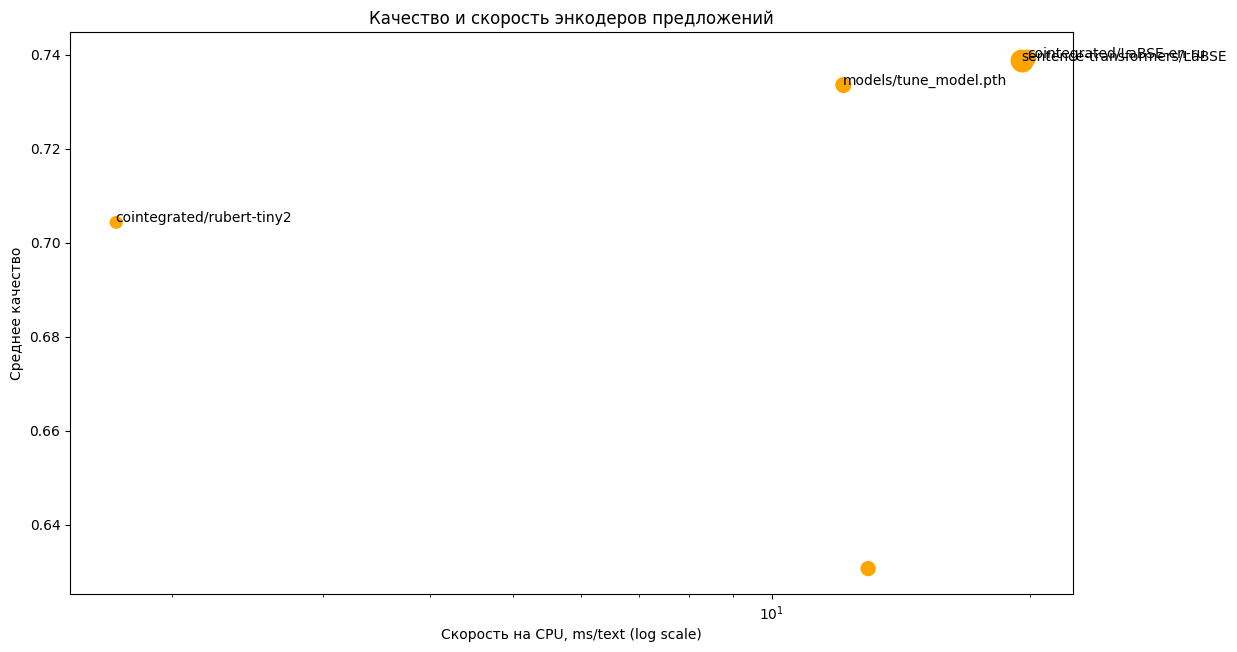

In [20]:
dpi = 60.3
# dpi = 80
fig = plt.figure(figsize=(780 / dpi, 440 / dpi))
ss = ss=10 + np.sqrt(df.disk_size) * 5
ax = plt.gca()
plot_frontier(ax, xx=df.cpu_speed, yy=df.mean_s, labels=df.model.to_list(), ss=ss)

plt.title('Качество и скорость энкодеров предложений')
ax.set_xscale('log');
ax.set_ylabel('Среднее качество');
ax.set_xlabel('Скорость на CPU, ms/text (log scale)');

Colormap the regret: how far a midel is from the best one

In [21]:
tmp2 = tmp[tmp.columns[:11]].set_index('model')
regret = tmp2 - tmp2.max(axis=0)
regret.style.background_gradient(axis=0, cmap="winter").highlight_max()

# System info

In [22]:
!lscpu

Архитектура:             x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         39 bits physical, 48 bits virtual
  Порядок байт:          Little Endian
CPU(s):                  20
  On-line CPU(s) list:   0-19
ID прроизводителя:       GenuineIntel
  Имя модели:            12th Gen Intel(R) Core(TM) i7-12700KF
    Семейство ЦПУ:       6
    Модель:              151
    Потоков на ядро:     2
    Ядер на сокет:       12
    Сокетов:             1
    Степпинг:            2
    CPU max MHz:         5000,0000
    CPU min MHz:         800,0000
    BogoMIPS:            7219.20
    Флаги:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss 
                         ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art
                          arch_perfmon pebs bts rep_good nopl xtopology nonstop_
                         tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes6

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [23]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3090 (UUID: GPU-10083b44-3572-eb83-0411-f0f509e954e9)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
torch.get_num_threads()

12

# Correlations

In [25]:
vert_headers = [
    #dict(selector="th",props=[('max-width', '80px')]),
    dict(
        selector="th.col_heading",
        props=[
            #("writing-mode", "vertical-rl"),
            ('transform', 'rotate(-90deg)'),
            ('vertical-align', 'bottom'),
        ]
    ),
]

In [26]:
df.corr(method='spearman', numeric_only=True).style.background_gradient(axis=None).format(precision=2).set_table_styles(vert_headers)